In [26]:
import pandas as pd
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt
% matplotlib inline

In [33]:
df = pd.read_excel('Pressure Test Results.xlsx')
pressures = []
for i,sm in np.array([df['Pressure'],df['Smooth or Crumpled']]).T:
    if sm == 'Smooth':
        pressures.append(i)
uns_pressures = pressures.copy()
pressures = sorted(pressures)[3:]


All pressures in psig
min and max pressure: 5.4 ; 7.15
Mean: 6.5
Median: 6.6
σ: 0.42753
37


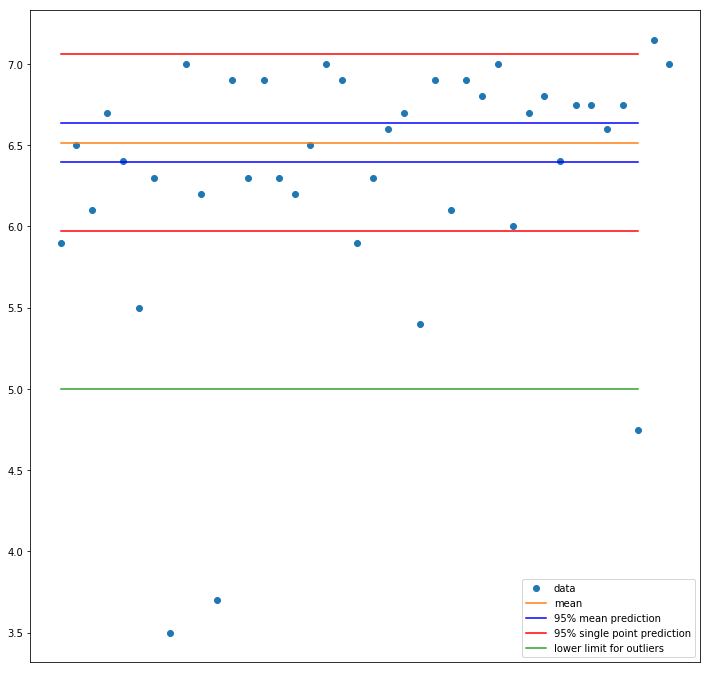

In [45]:
pressures = np.array(pressures)
mean = np.mean(pressures)
σ = np.std(pressures,ddof=1)
n = pressures.shape[0]
ci = t.ppf(.95, n - 1) * σ / np.sqrt(n)

plt.figure(figsize=(12,12))
plt.plot(uns_pressures, 'o', label='data')
plt.plot([0,n],[mean,mean],label='mean')
plt.plot([0,n],[mean+ci,mean+ci],'b',label="95% mean prediction")
plt.plot([0,n],[mean-ci,mean-ci],'b')
plt.plot([0,n],[mean-ci - σ,mean-ci - σ],'r',label="95% single point prediction")
plt.plot([0,n],[mean + ci + σ,mean + ci + σ],'r')
plt.plot([0,n],[5,5],label="lower limit for outliers")
plt.legend(loc=0)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
plt.savefig('rupture_data')

print("All pressures in psig")
print("min and max pressure:",min(pressures),';', max(pressures))
print('Mean: {:.1f}'.format(np.mean(pressures)))
print("Median: {:.1f}".format(np.median(pressures)))
print('σ: {:.5f}'.format(σ))
print(n)